<a href="https://colab.research.google.com/github/AnishaA-git/zoomApi/blob/master/heart_failure_scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [33]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.shape


(299, 13)

In [34]:
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [35]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [36]:
df.columns


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [37]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [38]:
X = StandardScaler().fit_transform(df)
X

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
        -6.87681906e-01, -1.62950241e+00,  1.45416070e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
        -6.87681906e-01, -1.60369074e+00,  1.45416070e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         1.45416070e+00, -1.59078490e+00,  1.45416070e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -6.87681906e-01,  1.90669738e+00, -6.87681906e-01],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         1.45416070e+00,  1.93250906e+00, -6.87681906e-01],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         1.45416070e+00,  1.99703825e+00, -6.87681906e-01]])

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
model
 KMeans(a

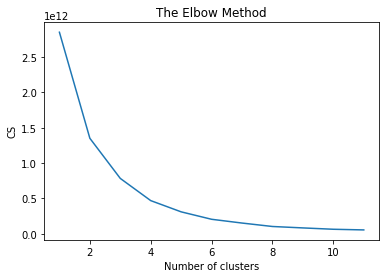

In [39]:
cs = []
for i in range(1, 12):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  model = kmeans.fit(df)
  print("model\n", model)
  cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


In [71]:

kmeans = KMeans(n_clusters=4)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [72]:
centers = model.cluster_centers_
centers

array([[ 4.76343517e-01,  2.19658426e-01, -2.48203381e-01,
        -3.19547168e-02, -3.65085474e-01,  2.03431677e-01,
        -8.48340719e-02,  5.01297726e-01, -4.00297870e-01,
         1.32882924e-02, -4.75910131e-02, -8.59454040e-01,
         1.38030406e+00],
       [-2.09697991e-01, -1.45500664e-01, -1.41540405e-01,
        -2.77370352e-01,  4.31770220e-02, -2.44682010e-01,
        -1.07225182e-01, -1.86969730e-01,  8.85808755e-02,
         7.35688190e-01,  1.45416070e+00,  4.34221852e-01,
        -5.87283034e-01],
       [-3.10826650e-01, -8.71104775e-01,  3.32093990e+00,
         3.10940550e-01, -1.40079215e-01, -5.86048211e-01,
         1.02833716e+00,  2.18943718e-01,  5.22838835e-01,
         2.86768254e-01,  7.72618808e-02, -1.33346973e-01,
         3.83239396e-01],
       [-1.76639115e-01,  1.78897487e-02, -1.18215512e-01,
         1.20735785e-01,  2.31046387e-01,  4.60131917e-02,
        -1.14734581e-03, -2.59045160e-01,  1.62962649e-01,
        -3.89961800e-01, -6.71698006e

In [73]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(df, centers):
	colNames = list(df)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [74]:
# Function that creates Parallel Plots

def parallel_plot(df):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(df, 'prediction', color = my_colors, marker='o')

In [76]:
P = pd_centers(df, centers)
P

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,prediction
0,0.476344,0.219658,-0.248203,-0.031955,-0.365085,0.203432,-0.084834,0.501298,-0.400298,0.013288,-0.047591,-0.859454,1.380304,0
1,-0.209698,-0.145501,-0.141540,-0.277370,0.043177,-0.244682,-0.107225,-0.186970,0.088581,0.735688,1.454161,0.434222,-0.587283,1
2,-0.310827,-0.871105,3.320940,0.310941,-0.140079,-0.586048,1.028337,0.218944,0.522839,0.286768,0.077262,-0.133347,0.383239,2
3,-0.176639,0.017890,-0.118216,0.120736,0.231046,0.046013,-0.001147,-0.259045,0.162963,-0.389962,-0.671698,0.364546,-0.655714,3


Heart Failure Event

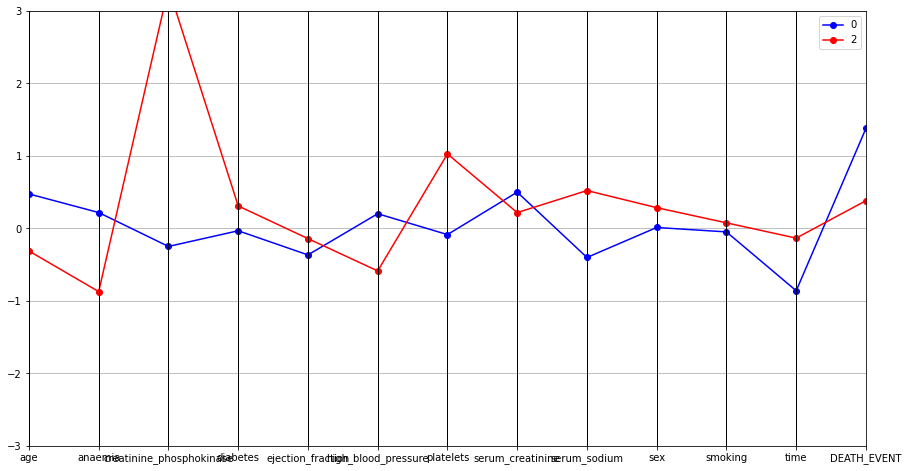

In [96]:
parallel_plot(P[P['DEATH_EVENT'] > 0])


No Heart Failure Event

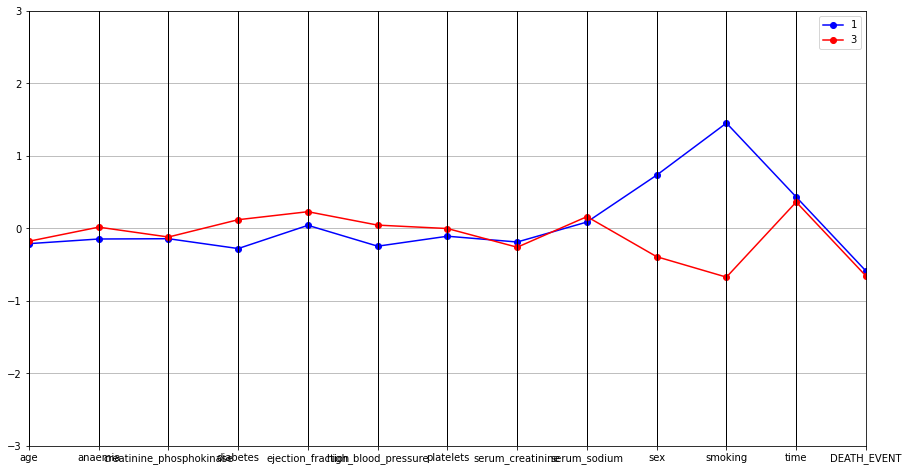

In [97]:
parallel_plot(P[P['DEATH_EVENT'] < 0])
